<a href="https://colab.research.google.com/github/KasunAt/CapstoneProject/blob/main/MLFoundations_Quiz_02_2022_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Bike Sharing Dataset
Reference: Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.[https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset]


# Student Name: << Kasun Atapattu >>
# Date : << 29/4/2022>>

# Assignment Instructions
* You will be given ten (10) tasks to complete the code cells. Some tasks may contain subtasks that you will get partial points for completing each.
* **Provide your code ONLY in between hash (#) lines.**
* Do not add or modify code outside the hash (#) lines!
* Example answers, partially completed code, or hints may be provided for some tasks.
* You may diagnose any programing errors encountered and resolve them to get the final solution.

### Example Answer:
**Task 0: create variable named `a` and assign value `3.14`. Then print the value of `a`.**

```python
# Task 0: Type your code below
###############################
a = 3.14
print(a)
###############################
```

# The Problem

A bike rental business owner hired you to build a machine learning solution to enhance his business functions by predicting how many bikes will be rented in a given day.

The business owner provided you with a data set containing daily rental counts collected for two years. You also have some information about each date and weather observations in the dataset.

## 1. Load Python Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2. Load Data File

In [2]:
file_path= 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/daily_bike_rental.csv'

# Load CSV File
data = pd.read_csv(file_path)

## 3. Check Completeness of the Dataset


In [3]:
# Optional Task: Preview a sample of 5 rows of the datset
#############################################################
data.sample(5)

#############################################################

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
304,304,2011,11,1,TUE,0,1.0,CLEAR,16.4,19.9,68.4,9.1,4068
517,517,2012,6,1,FRI,0,1.0,CLOUDY/MIST,26.8,30.4,75.5,15.9,4127
598,598,2012,8,21,TUE,0,1.0,CLEAR,26.6,30.1,67.4,4.9,7006
393,393,2012,1,29,SUN,0,0.0,CLEAR,11.6,13.6,31.1,16.1,3243
306,306,2011,11,3,THU,0,1.0,CLEAR,16.7,20.3,70.2,9.2,3974


In [4]:
# Optional Task: Identify column data types
#############################################################
data.dtypes

#############################################################

row_id                int64
year                  int64
month                 int64
day                   int64
weekday              object
is_holiday            int64
is_workingday       float64
weather_type         object
temperature         float64
feel_temperature    float64
humidity            float64
windspeed           float64
rental_count          int64
dtype: object

In [5]:
# Optional Task: Identify columns with missing values if there are any
#############################################################
data.isnull().any()

#############################################################

row_id              False
year                False
month               False
day                 False
weekday             False
is_holiday          False
is_workingday        True
weather_type        False
temperature         False
feel_temperature     True
humidity            False
windspeed           False
rental_count        False
dtype: bool

In [6]:
# Optional Task: Complete code below to print number of rows and columns.
#############################################################
rows =  data.shape[0]
columns =  data.shape[1]
#############################################################
print(F"rows = {rows}, columns={columns}")


rows = 731, columns=13


## 4. Treat Missing Values and Outliers
 



**Task 1 : Treating Outlliers**
 * 1.1 Identify Columns with Outliers
 * 1.2 Remove Rows with Outlier Values

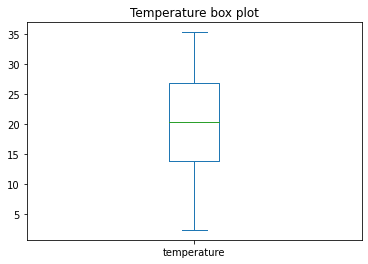

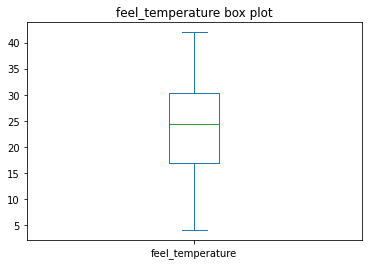

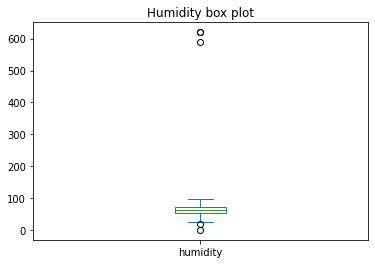

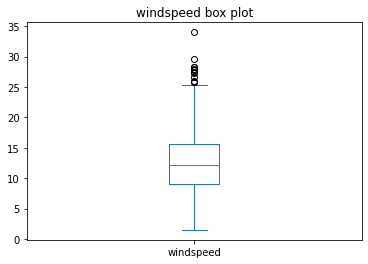

In [7]:
# Task 1.1: Type your code you used to find columns with Outliers. 
#  Hint 1:  use print() to display intermediate results
#  Hint 2 : use Box Plots as a visual tool
#############################################################
data['temperature'].plot(kind='box', title='Temperature box plot')
plt.show()
data['feel_temperature'].plot(kind='box', title='feel_temperature box plot')
plt.show()
data['humidity'].plot(kind='box', title='Humidity box plot')
plt.show()
data['windspeed'].plot(kind='box', title='windspeed box plot')
plt.show()
#############################################################

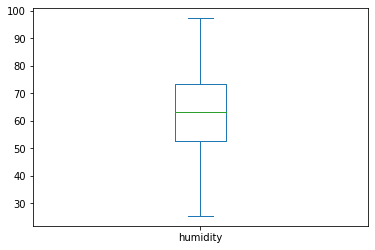

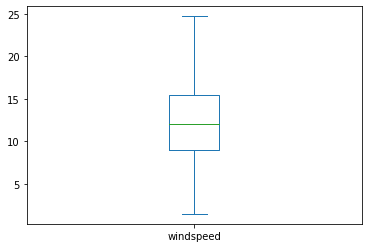

699


In [209]:
# Task 1.2: Remove rows containing outlier values
#############################################################
#remove outlier from Humidity
q1 = data['humidity'].quantile(q=0.25)
q3 = data['humidity'].quantile(q=0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)
data.drop(data[data['humidity'] < lower_bound].index, inplace = True)
data.drop(data[data['humidity'] > upper_bound].index, inplace = True)
data['humidity'].plot(kind='box')
plt.show()

#remove outlier from windspeed
r1 = data['windspeed'].quantile(q=0.25)
r3 = data['windspeed'].quantile(q=0.75)
lower_bound = r1 - 1.5*(r3-r1)
upper_bound = r3 + 1.5*(r3-r1)
data.drop(data[data['windspeed'] < lower_bound].index, inplace = True)
data.drop(data[data['windspeed'] > upper_bound].index, inplace = True)
data['windspeed'].plot(kind='box')
plt.show()

print(data.shape[0])
#############################################################

**Task 2 : Treating Missing Values**
 * 2.1 Identify and remove rows cotaining missing values

In [12]:
# Task 2.1:  Identify and remove rows cotaining missing values
#############################################################
data.dropna(how='any', axis=0, inplace=True)
data.isnull().any()

#############################################################

row_id              False
year                False
month               False
day                 False
weekday             False
is_holiday          False
is_workingday       False
weather_type        False
temperature         False
feel_temperature    False
humidity            False
windspeed           False
rental_count        False
dtype: bool

**Task 3: Analyze `weather_type` and `weekday` columns**

 * 3.1 Get construct and display freqeuncy table for the column 'weather_type'
 * 3.2 Get a summary table of average `rental_count` by `weather_type'.
 * 3.3 Get a ummary table of average `rental_count` by `weekday`

In [13]:
#############################################################
# Task 3.1: Type your code to construct and display freqeuncy table for the column 'weather_type'.
data['weather_type'].value_counts()
#############################################################

CLEAR              443
CLOUDY/MIST        236
LIGHT RAIN/SNOW     20
Name: weather_type, dtype: int64

In [14]:
# Task 3.2: summary table of average `rental_count` by `weather_type`
# Hint: use group by
#############################################################
data.groupby(by='weather_type')['rental_count'].count()

#############################################################

weather_type
CLEAR              443
CLOUDY/MIST        236
LIGHT RAIN/SNOW     20
Name: rental_count, dtype: int64

In [15]:
# Task 3.3: summary table of average `rental_count` by `weekday`
# Hint: use group by
#############################################################
data.groupby(by='weekday')['rental_count'].count()

#############################################################

weekday
FRI     97
MON    100
SAT     98
SUN    100
THU    100
TUE    103
WED    101
Name: rental_count, dtype: int64

# 5. Encoding

**Task 4: Encode categorical columns `weather_type` and `weekday` to numeric values**

 * 4.1 Encode categorical columns `weather_type`
 * 4.2 Encode categorical columns `weekday`

**Encoding scheme**
**weather_type**
* CLEAR -> 1 
* CLOUDY/MIST -> 2
* LIGHT RAIN/SNOW -> 3

**weekday**
* SUN -> 1 
* MON -> 2 
* TUE -> 3 
* WED -> 4 
* THU -> 5 
* FRI -> 6 
* SAT -> 7 

In [18]:
# Task 4.1: Encode categorical columns weather_type
# Hint: use replace()
#############################################################
WT = {'CLEAR' : 1, 'CLOUDY/MIST' : 2, 'LIGHT RAIN/SNOW' : 3}
data['weather_type'] = data['weather_type'].replace(WT)
data.sample(5)
#############################################################

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
618,618,2012,9,10,MON,0,1.0,1,23.9,28.3,50.4,17.3,7525
541,541,2012,6,25,MON,0,1.0,1,29.3,32.7,50.4,20.1,6779
15,15,2011,1,16,SUN,0,0.0,1,9.5,11.7,48.4,12.6,1204
266,266,2011,9,24,SAT,0,0.0,2,24.9,28.2,86.2,5.3,5423
24,24,2011,1,25,TUE,0,1.0,2,9.2,11.7,61.7,8.7,1985


In [19]:
# Task 4.2: Encode categorical columns weather_type
# Hint: use replace()
#############################################################
WD = {'SUN': 1,'MON': 2,'TUE': 3,'WED': 4,'THU' : 5,'FRI': 6,'SAT': 7}
data['weekday'] = data['weekday'].replace(WD)
data.sample(5)

#############################################################

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
724,724,2012,12,25,3,1,0.0,2,11.9,14.7,73.5,11.3,1013
461,461,2012,4,6,6,0,1.0,1,16.5,19.5,37.7,20.1,6460
34,34,2011,2,4,6,0,1.0,2,8.7,11.4,58.5,8.6,1708
149,149,2011,5,30,2,1,0.0,1,30.1,33.6,68.5,8.8,4098
301,301,2011,10,29,7,0,0.0,3,10.4,11.4,88.2,23.5,627


# 6. Building Machine Learning model

**Task 5: Get correlation_matrix for all numeric columns**

In [20]:
# Task 5: Complete the code below using correlation function Pandas.
#############################################################
correlation_matrix = data[['weekday', 'is_holiday', 'is_workingday', 'weather_type', 'temperature', 'feel_temperature', 'humidity', 'windspeed', 'rental_count']].corr()

#############################################################

correlation_matrix

,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
weekday,1.000000,-0.097249,0.037713,0.026296,0.006679,-0.000333,-0.046944,-0.007327,0.071334
is_holiday,-0.097249,1.000000,-0.254932,-0.045680,-0.017949,-0.021627,-0.016207,0.018380,-0.059705
is_workingday,0.037713,-0.254932,1.000000,0.068533,0.035545,0.033578,0.023363,-0.002625,0.040250
weather_type,0.026296,-0.045680,0.068533,1.000000,-0.121739,-0.123526,0.636108,0.053672,-0.302232
temperature,0.006679,-0.017949,0.035545,-0.121739,1.000000,0.991449,0.108586,-0.145424,0.624554
feel_temperature,-0.000333,-0.021627,0.033578,-0.123526,0.991449,1.000000,0.119633,-0.169326,0.627851
humidity,-0.046944,-0.016207,0.023363,0.636108,0.108586,0.119633,1.000000,-0.198589,-0.143357
windspeed,-0.007327,0.018380,-0.002625,0.053672,-0.145424,-0.169326,-0.198589,1.000000,-0.213742
rental_count,0.071334,-0.059705,0.040250,-0.302232,0.624554,0.627851,-0.143357,-0.213742,1.000000


**Task 6: Create new variable `is_weekend`**

In [25]:
# Task 6: Type your code below to create a new variable `is_weekend` (1 if weekdaay is either 'SAT' or 'SUN')
# Hint: Replace "?" by the appropriate expression
#############################################################
data['is_weekend'] = np.where((data['weekday']==1) | (data['weekday']==7), 1,0)
data.sample(5)
#############################################################

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count,is_weekend
81,81,2011,3,23,4,0,1.0,2,14.2,16.9,84.0,15.7,2121,0
140,140,2011,5,21,7,0,0.0,1,24.7,28.6,62.7,8.1,5805,1
366,366,2012,1,2,2,1,0.0,1,11.2,12.6,38.1,22.1,1951,0
475,475,2012,4,20,6,0,1.0,1,21.6,25.8,69.5,10.0,7290,0
718,718,2012,12,19,4,0,1.0,1,13.6,17.1,62.5,12.3,5267,0


**Task 7:** 
 * 7.1 Identify indepenet (X) and dependent (y) variables your would use to build the model
 * 7.2 Split dataset into two datasets: tain and test
 * 7.3 Train Model
 * 7.4 Predict on Test Dataset and create a new DataFrame containing predict and actuals columns.
 * 7.5 Find Mean Squared Error

In [26]:
# Get liest of column names
data.columns

Index(['row_id', 'year', 'month', 'day', 'weekday', 'is_holiday',
       'is_workingday', 'weather_type', 'temperature', 'feel_temperature',
       'humidity', 'windspeed', 'rental_count', 'is_weekend'],
      dtype='object')

In [184]:
# Task 7.1: Identify indepenet (X) and dependent (y) variables and complete the code below. 
# You may need to type of copy column names from the dataframe. It is recomended to begin with minimum selected feature variables.
#############################################################

#optimum features selected

X_variables = ['weather_type', 'feel_temperature','humidity', 'windspeed', 'is_holiday']
y_variable = 'rental_count'
#############################################################

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['weather_type', 'feel_temperature', 'humidity', 'windspeed', 'is_holiday']
y_variable = rental_count


In [185]:
# Task 7.2 Type your code below to split the dataset into two datasets: train and test
# Hint1: use appropriate function from scikit-learn (replace "?"  by the correct expression to import the function)
# Hint 2: Use parameters test_size=0.3, random_state=0
#############################################################
from sklearn.model_selection import train_test_split

X = data[X_variables]
y = data[y_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#############################################################
print("X_train size:", X_train.shape[0])
print("X_test size:", X_test.shape[0])

X_train size: 489
X_test size: 210


In [186]:
# Task 7.3 Train model
# Hint1: use appropriate DataDrame variables (replace "?"  by the correct expression to import the function)
from sklearn.linear_model import LinearRegression
#############################################################
X = X_train[X_variables]
y = y_train

#############################################################
reg = LinearRegression().fit(X, y)

In [187]:
# Task 7.4 Predict on Test Dataset and create a new DataFrame (`results`) containing predict (`y_test_pred`) and actual (`y_test_actual`) columns.
# Hint1: use appropriate DataDrame variables (replace "?"  by the correct expression to import the function)
#############################################################
X_test_features = X_test[X_variables]
y_test_actual = y_test.values

y_test_pred = reg.predict(X_test_features)

results = pd.DataFrame({'y_test_pred':y_test_pred, 'y_test_actual':y_test_actual})
#############################################################
results.head()

,y_test_pred,y_test_actual
0,5533.793724,7030
1,7156.350901,6241
2,3173.813783,1472
3,4668.978787,5698
4,3126.385415,1248


# 7. Model Evaluation

In [188]:
# Task 8.1: Find Mean Squared Error
# Hint1: use appropriate function from scikit-learn (replace "?"  by the correct expression to import the function)
#############################################################
from sklearn.metrics import mean_squared_error

print('MSE:', mean_squared_error(y_test_actual, y_test_pred))
#############################################################

MSE: 2026147.907406527


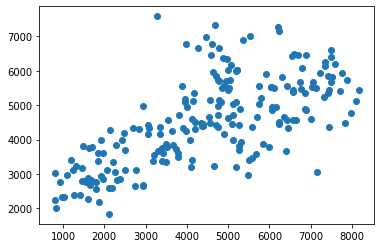

In [189]:
# Bonus/Optional: plot `y_test_pred` vs `y_test_actual` 
#############################################################
plt.scatter(y_test_actual, y_test_pred)

#############################################################

# 8.1 Changing the problem to a Classification Problem
The business owner asked you to create secondery model to predict whether or not they make 5000 rentals in a given day. Your task now is to create a binary classifier model.

**Task 8:** 
 * 8.1 Create y variable (`is_rental_gt_5k`) for binary classifier

**Condition:**
if `rental_count>=5000` then `1` else `0`

In [193]:
#  8.1 Create y variable for binary classifier
#############################################################
data['is_rental_gt_5k'] = np.where(data['rental_count']>=5000, 1, 0)

#############################################################
data['is_rental_gt_5k'].value_counts()

0    423
1    276
Name: is_rental_gt_5k, dtype: int64

**Task 9: Build Model**

In [200]:
# Task 9.1: Identify indepenet (X) and dependent (y) variables and complete the code below. 
# You may need to type of copy column names from the dataframe. It is recomended to begin with minimum selected feature variables.
#############################################################
X_variables = ['weather_type', 'feel_temperature','humidity', 'windspeed', 'is_holiday']
y_variable = 'is_rental_gt_5k'
#############################################################

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['weather_type', 'feel_temperature', 'humidity', 'windspeed', 'is_holiday']
y_variable = is_rental_gt_5k


In [201]:
# Task 9.2 Train model using Random Forest Classifier
# Hint 1: use same train and test datasets above
# Hint 2 : import scikit-learn Random Forest Classifier model class (replace "??"  by the correct expression to import the function)
# Hint 3 : use appropriate DataDrame variables (replace "?"  by the correct expression to import the function)
from sklearn.ensemble import RandomForestClassifier
#############################################################

X = data[X_variables]
y = data[y_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X = X_train[X_variables]
y = y_train
#############################################################
reg = RandomForestClassifier().fit(X, y)

In [202]:
# Task 9.3 Predict on Test Dataset and create a new DataFrame (`results`) containing predicted probability (`y_test_pred_prob`), predict (`y_test_pred`), and actual (`y_test_actual`) columns.
# Hint1: use appropriate DataDrame variables (replace "?"  by the correct expression to import the function)
#############################################################
X_test_features = X_test[X_variables]
y_test_actual =y_test.values

y_test_pred = reg.predict(X_test_features)
y_test_pred_prob = reg.predict_proba(X_test_features)[:, 1]

results2 = pd.DataFrame({'y_test_actual':y_test_actual, 'y_test_pred':y_test_pred, 'y_test_pred_prob' : y_test_pred_prob })
#############################################################
results2.head()

,y_test_actual,y_test_pred,y_test_pred_prob
0,1,1,0.81
1,1,1,0.54
2,0,0,0.17
3,1,0,0.47
4,0,0,0.06


**Task 10: Evaluate Model**


In [207]:
# Task 10.1: Create Confusion Matrix
# complete the code below
#############################################################
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test_actual, y_test_pred)

#############################################################
print(cf_matrix)

[[98 26]
 [29 57]]


In [205]:
# Task 10.2: Compute Area Under ROC curve
# complete the code below
# Hint1: use appropriate DataDrame variables (replace "?"  by the correct function or variable)
from sklearn import metrics

#############################################################

cf_matrix = metrics.roc_auc_score(y_test_actual, y_test_pred)

#############################################################
print(cf_matrix)

0.7265566391597899


In [206]:
# Task 10.3: Get Precision ,recall and F1 score and display results
# Hint: use functions avaiable in `metrics`
#############################################################

print('recall : ', metrics.recall_score(y_test_actual, y_test_pred, average='weighted'))
print('precision : ' , metrics.precision_score(y_test_actual, y_test_pred, average='weighted'))
print('f1 : ',metrics.f1_score(y_test_actual, y_test_pred, average='weighted'))


#############################################################


recall :  0.7380952380952381
precision :  0.7368822873044483
f1 :  0.7373358075166226


<hr>
Last update 2022-04-09 by Sumudu Tennakoon